# README

In this notebook i will develop the instructions in INSTRUCTIONS.md

In the app.py file i wrote some function that I called multiple times during this notebook.

## 1.

First we set up the sesion client to interact with the Spotify API and import the modules used in the rest of the notebook.

In [ ]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
import app

# imports for statistics and graphs.
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
import numpy as np
from scipy import stats
from sklearn.metrics import r2_score


load_dotenv()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)
app.set_API_client(spotify) # important so the functions inside app.py know which client to use.

## 2. 

We check the top tracks for La máquina de hacer pájaros and use the app.create_df_from_tracks() function.

In [ ]:
artist_id = '40c6EALi3nTmNeOAS3Eu5h' #id for "La máquina de hacer pájaros".
results = spotify.artist_top_tracks(artist_id)
    
df = app.create_df_from_tracks(results['tracks'])
df

,name,popularity,duration_min,album
0,Como Mata el Viento Norte,48,2.740667,La Máquina De Hacer Pájaros
1,Que Se Puede Hacer Salvo Ver Peliculas,47,6.202433,Peliculas
2,Hipercandombe,46,4.510433,Peliculas
3,No Te Dejes Desanimar,44,4.132433,Peliculas
4,Por Probar El Vino Y El Agua Salada,42,3.344883,La Máquina De Hacer Pájaros
5,Rock And Roll,42,4.119100,La Máquina De Hacer Pájaros
6,"Boletos, Pases Y Abonos",40,6.516883,La Máquina De Hacer Pájaros
7,Bubulina,39,5.597550,La Máquina De Hacer Pájaros
8,Ah Te Vi Entre Las Luces,39,11.175100,La Máquina De Hacer Pájaros
9,Obertura 777 - Instrumental,38,4.851550,Peliculas


## 3. 
Here we do the same but for every song they have, not just their top tracks.

In [14]:
tracks = app.artist_tracks(artist_id, album_type = 'album')
df = app.create_df_from_tracks(tracks)
df

,name,popularity,duration_min,album
0,Obertura 777 - Instrumental,38,4.851550,Peliculas
1,"Marilyn, La Cenicienta Y Las Mujeres",37,4.399100,Peliculas
2,No Te Dejes Desanimar,44,4.132433,Peliculas
3,Que Se Puede Hacer Salvo Ver Peliculas,47,6.202433,Peliculas
4,Hipercandombe,46,4.510433,Peliculas
5,Vendedor De Las Chicas De Plastico,37,4.724883,Peliculas
6,Ruta Perdedora,36,5.633550,Peliculas
7,En Las Calles De Costa Rica,35,3.991333,Peliculas
8,Bubulina,39,5.597550,La Máquina De Hacer Pájaros
9,Como Mata el Viento Norte,48,2.740667,La Máquina De Hacer Pájaros


## 4. 
This part is meant to automatize the process of analyzing multiple artists at once.

The varible artists_to_analyze contains a dictionary that has the artist id, name and the information of every single one of their tracks released on album.

In [16]:
artists_ids = {
    'Dream Theather':'2aaLAng2L2aWD2FClzwiep',
    'Michael Jackson':'3fMbdgg4jU18AjLCKBhRSm',
    'Stiven Wilson': '4X42BfuhWCAZ2swiVze9O0',
    'Bad bunny':'4q3ewBCX7sLwd24euuV69X',
    'Kali Uchis': '1U1el3k54VvEUzo3ybLPlM',
    'Childish gambino':'73sIBHcqh3Z3NyqHKZ7FOL',
    'Metallica':'2ye2Wgw4gimLv2eAKyk1NB',
    'Nathy Peluso': '3VHAySZQPlfGlNLslzXYpN'

}

artists_to_analyze = {
    artist : {
        'id':artist_id,
        'name': artist,
        'artist_df': app.create_df_from_tracks(app.artist_tracks(artist_id, album_type = 'album'))
    }
    for artist, artist_id in artists_ids.items()
}


## 5. 
The next script creates plots for every band listed in artists_ids in the code cell above and also performs some statistical tests used in the conclusion of this notebook.

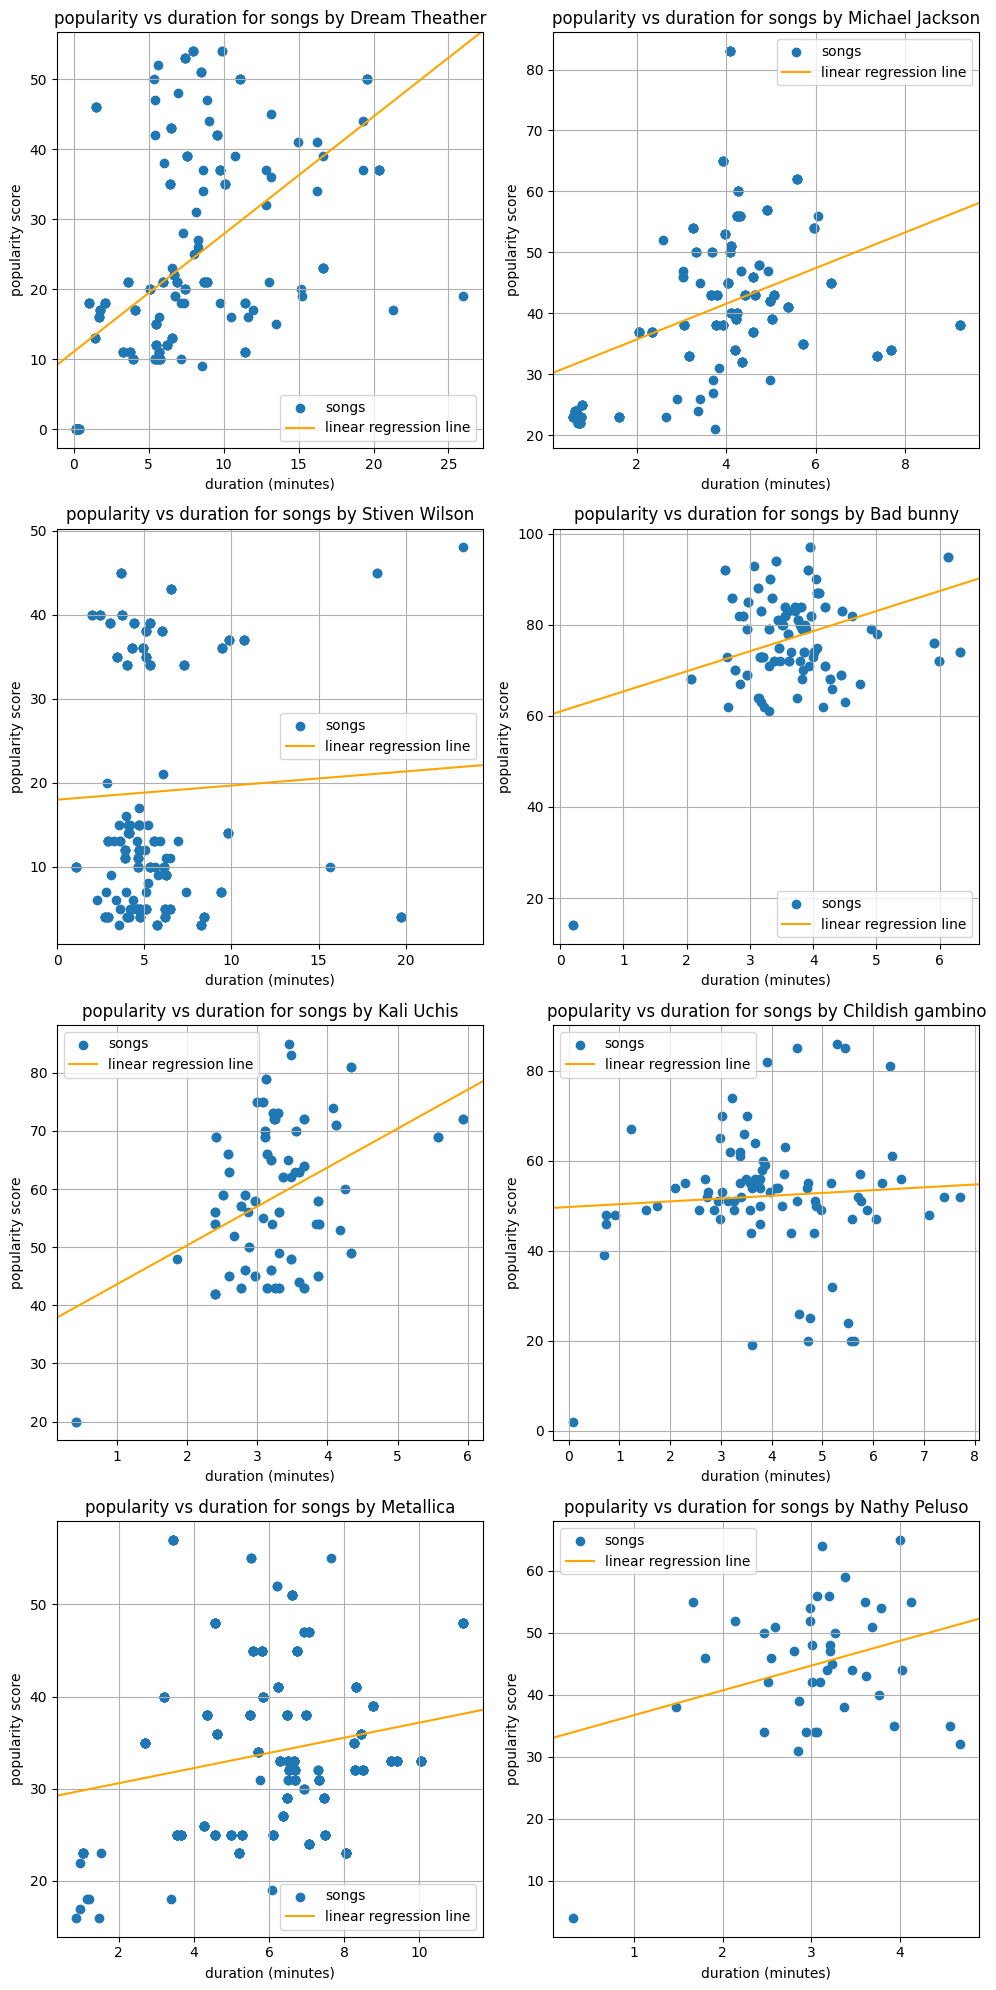

,R_squared,spearman_r_p_value,correlation_coeficient
artists,,,
Dream Theather,0.292188,6.410071e-30,0.647559
Michael Jackson,0.176896,6.484775e-12,0.406996
Stiven Wilson,0.001423,1.913193e-01,-0.085722
Bad bunny,0.122815,5.415170e-01,0.053819
Kali Uchis,0.172261,3.518647e-03,0.272356
Childish gambino,0.004394,8.912426e-01,-0.014962
Metallica,0.038375,3.827255e-03,0.142707
Nathy Peluso,0.090257,4.317185e-01,0.123072


In [ ]:

# some values to set up the sub plots figure parametrically.

n = int(ceil(len(artists_ids)/2))
m = 2
scale = 5

fig, ax = plt.subplots(n,m)
fig.set_size_inches(scale*m, scale*n)

# with this dict we will create the Dataframe containing the stats.
stats_dict ={
    'artists': [],
    'R_squared': [],
    'spearman_r_p_value': [],
    'correlation_coeficient': []
}

for i in range(n):
    for j in range(m):
        index = i*2 + j
        artist_name = list(artists_to_analyze.keys())[index]
        artist_df = artists_to_analyze[artist_name]['artist_df']

        x = artist_df.duration_min
        y = artist_df.popularity

        ax[i,j].set_title(f'popularity vs duration for songs by {artist_name}')
        ax[i,j].scatter(x, y)
        ax[i,j].set_xlabel('duration (minutes)')
        ax[i,j].set_ylabel('popularity score')
        ax[i,j].grid(True)

        # the block of lines below performs the statistical tests and linear regression.
        reg = stats.linregress(x, y)
        a, b = reg.slope, reg.intercept
        r2 = r2_score(y, x*a+b)
        spearman = stats.spearmanr(x, y)
        stats_dict['artists'].append(artist_name)
        stats_dict['R_squared'].append(r2)
        stats_dict['spearman_r_p_value'].append(spearman.pvalue)
        stats_dict['correlation_coeficient'].append(spearman.statistic)

        # The blocks of lines below draw the line obtained by the linear regression.
        xlim = np.array(ax[i,j].get_xlim())
        ylim = np.array(ax[i,j].get_ylim())
        ax[i,j].plot(xlim, a*xlim+b, color = 'orange')
        ax[i,j].set_xlim(xlim)
        ax[i,j].set_ylim(ylim)

        ax[i,j].legend(['songs', 'linear regression line'])

stats_df = pd.DataFrame(stats_dict)
stats_df.set_index('artists', drop=True, inplace=True)

plt.tight_layout()
plt.show()

stats_df

## what the data tells us
Here we are comparing artists and bands from different generes and did some conclusions using linear regression and the Spearman rank correlation coefficient.
we choose the later to determine statistically if there is a correlation between duration and popularity because the data has outliers and the relation is very likely non linear (very short songs can't be popular, think obout who is going to listen consitently a song of 30 seconds or less. Very long songs won't cut it either, I do not know many people who like songs 20 min long).

By using the linear regression method we see something surprising and counter intuitive, the popularity increases when the duration does too. This conclusion though may not seem so trustable if we take into account that the R-squared value for each line is really small. Nonetheless, using the spearman-r test we find that for half of the artists selected there is a clear tendency, longer songs are going to get you in general better popularity. That conclusion may not be true for Bad Bunny, Childish Gambino, Nathy Peluso and to my surprise Steven Wilson (he is a prog rock artist, and within that genre people tend to like longer songs not having any trouble listening to 20 min songs). Those artists are the ones for which we could not reject the null hypothesis.

I spected dream theater to have a strong correlation between duration and popularity because they are a progressive metal band, and effectively they have the strongest correlation of them all.

Not for every artist is there a correlation between duration and popularity, but for some there is And for every artist except childish gambino and stiven wilson, the correlation coeficient is possitive, which indicates that if there is a correlation at all it is because when the duration increases so does the popularity.


## final thoughts

Althoug we conclude from this analysis that for some artists there is a positive correlation between duration and popularity, we can only theorize abut the reasons why this happens (assuming the analysis is correct).

It is something commonly thought by people, that longer songs are in general less popular. We have seen plenty of producers saying this but our analysis suggest something different. Here are some of my hypothesis for why are we getting this results :
    - The statistical test I choose was not adequate.
    - Producers are right, loger songs are less popular, but they over shoot it by shortening the songs more that what they actually need.
    - Producers are just wrong, songs should be longer.
    - The songs that are longer are not shortened by producers or artists because they are very good as they are and altering them in that way might make them worse.
    - Some combination of the hypothesis above.




